In [14]:
import pygame
import sys
import random

# Pygame 초기화
pygame.init()

# 화면 설정
width, height = 800, 600
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("벽돌 부수기 게임")

# 색상 정의
# r, g, b = random.randrange(255), random.randrange(255), random.randrange(255)
def colorChoice(x=255):
    return random.randrange(x)

r, g, b = colorChoice(), colorChoice(), colorChoice()

white = (r, g, b)
black = (0, 0, 0)
red = (255, 0, 0)
green = (0, 255, 0)
blue = (0, 0, 255)



# 공 클래스 정의
class Ball(pygame.sprite.Sprite):
    def __init__(self):
        super().__init__()
        self.image = pygame.Surface((20, 20), pygame.SRCALPHA)
        pygame.draw.circle(self.image, red, (10, 10), 10)
        self.rect = self.image.get_rect()
        self.reset()

    def reset(self):
        self.rect.center = (width // 2, height // 2)
        self.speed = [5, -5]

    def update(self):
        self.rect.x += self.speed[0]
        self.rect.y += self.speed[1]

        # 화면 경계와의 충돌 검사
        if self.rect.left < 0 or self.rect.right > width:
            self.speed[0] = -self.speed[0]
        if self.rect.top < 0:
            self.speed[1] = -self.speed[1]
        elif self.rect.bottom > height:
            self.reset()

# 패들 클래스 정의
class Paddle(pygame.sprite.Sprite):
    def __init__(self):
        super().__init__()
        self.image = pygame.Surface((100, 20), pygame.SRCALPHA)
        pygame.draw.rect(self.image, green, (0, 0, 100, 20))
        self.rect = self.image.get_rect()
        self.rect.center = (width // 2, height - 30)

    def update(self):
        keys = pygame.key.get_pressed()
        if keys[pygame.K_LEFT] and self.rect.left > 0:
            self.rect.x -= 5
        if keys[pygame.K_RIGHT] and self.rect.right < width:
            self.rect.x += 5

# 벽돌 클래스 정의
class Brick(pygame.sprite.Sprite):
    def __init__(self, x, y):
        super().__init__()
        self.image = pygame.Surface((80, 20), pygame.SRCALPHA)
        pygame.draw.rect(self.image, blue, (0, 0, 80, 20))
        self.rect = self.image.get_rect()
        self.rect.topleft = (x, y)

# 그룹 생성
all_sprites = pygame.sprite.Group()
bricks = pygame.sprite.Group()

# 벽돌 배치
for row in range(5):
    for col in range(10):
        brick = Brick(col * 80, row * 20)
        all_sprites.add(brick)
        bricks.add(brick)

# 플레이어 및 공 생성
player = Paddle()
ball = Ball()
all_sprites.add(player, ball)

# 게임 루프
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

    # 모든 스프라이트 업데이트
    all_sprites.update()

    # 공과 패들 충돌 검사
    if pygame.sprite.collide_rect(ball, player):
        ball.speed[1] = -ball.speed[1]



    # 공과 벽돌 충돌 검사
    hit_bricks = pygame.sprite.spritecollide(ball, bricks, True)
    if hit_bricks:
        ball.speed[1] = -ball.speed[1]

    # 화면을 흰색으로 채우기
    screen.fill(white)

    # 모든 스프라이트 그리기
    all_sprites.draw(screen)

    # 화면 업데이트
    pygame.display.flip()

    # 초당 프레임 수 조절
    pygame.time.Clock().tick(60)


SystemExit: 

In [ ]:
#색상 정의
# def colorChoice(x=255):
#     return random.randrange(x)

# r, g, b = colorChoice(), colorChoice(), colorChoice()

color={'white':(255, 255, 255),
       'red':(255, 0, 0),
       'blue':(0, 0, 255)}

# 공 크기

ball_x = random.randint(ball_radius, screen_width - ball_radius) # 

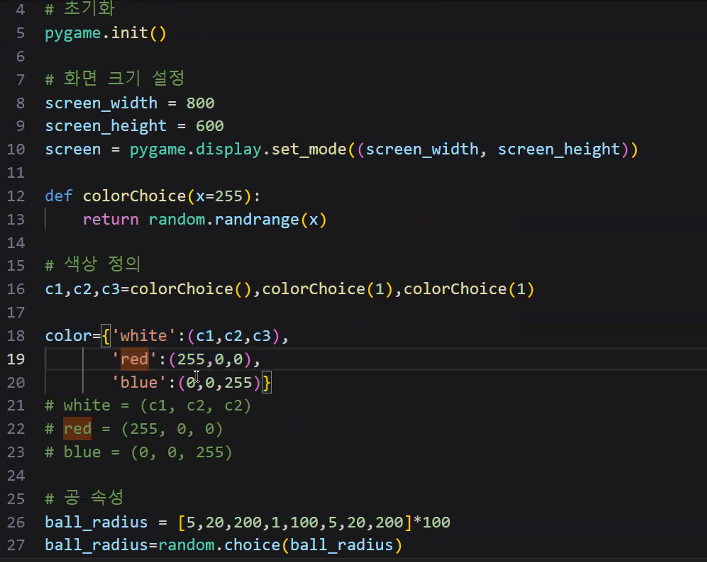
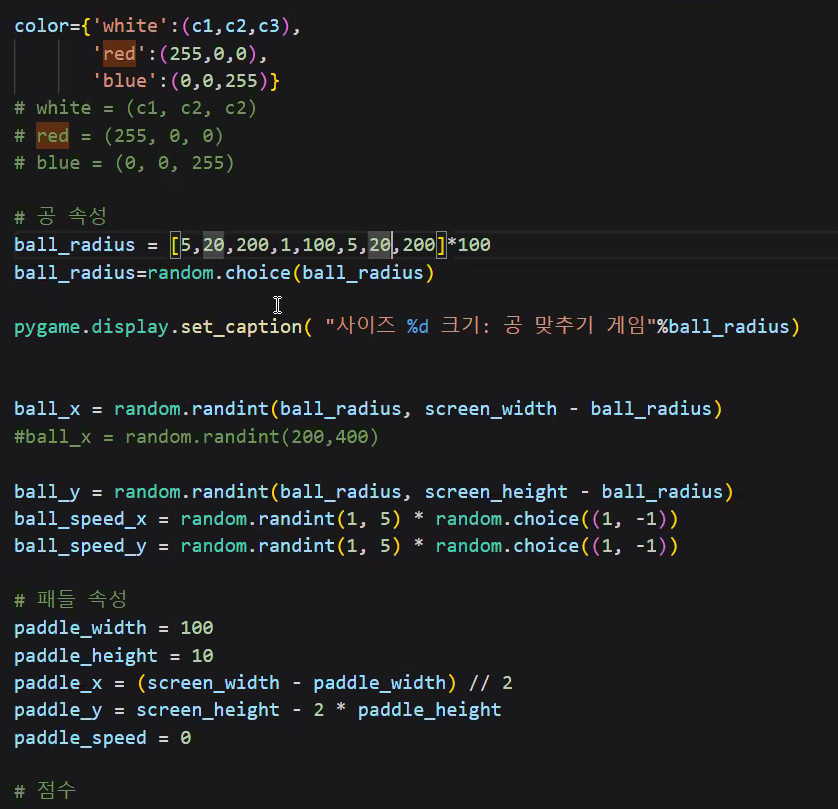
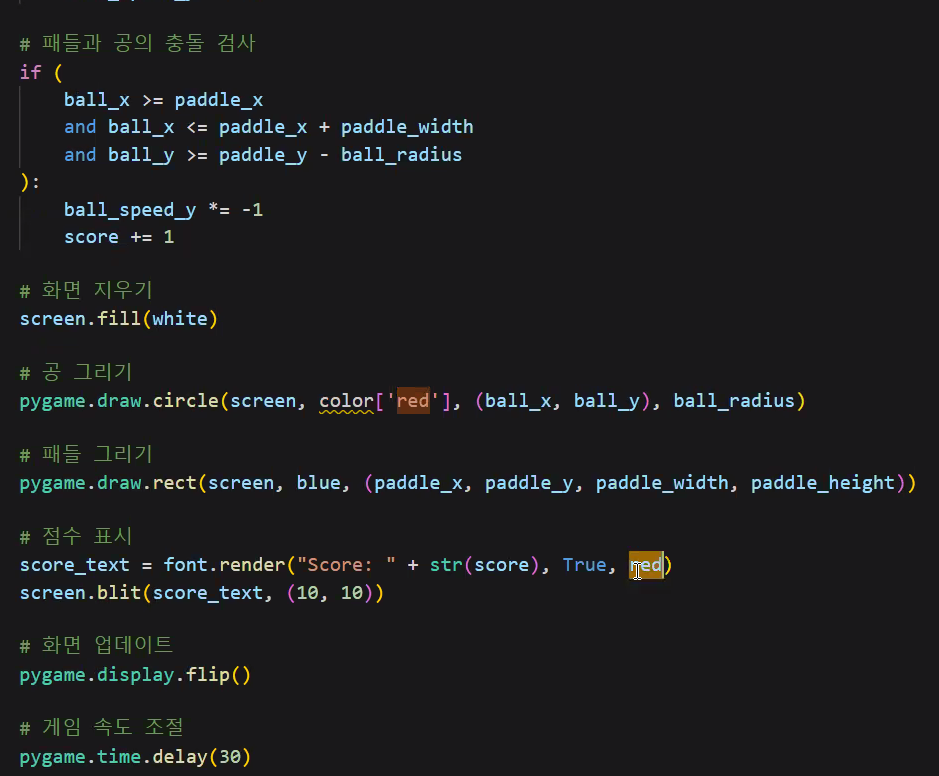
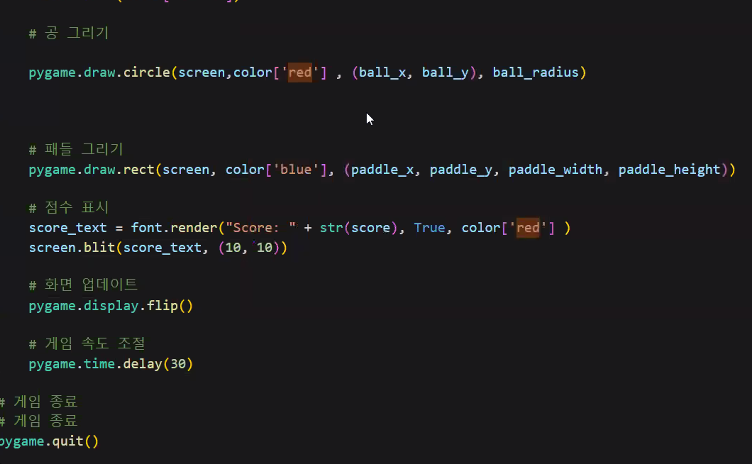

### 자료를 효율적으로 관리하는 방법
- 색상을 랜덤으로 정해줄 때, 딕셔너리 키 값이 매우 많으면 코드로 쓰는 것보다 json으로 관리하는 게 편함
- -> 메모장에 컬러 딕셔너리 내용을 넣고 확장자를 .json으로 저장한 다음에 코드 안에서 불러와 해당 키 값을 찾아 값 넣으면 됨